# Bayesian Linear Regression Overview

## Introduction

This notebook was created by [Jupyter AI](https://github.com/jupyterlab/jupyter-ai) with the following prompt:

> /generate a notebook for describing linear regression with bayesian methods

The Jupyter notebook outlines linear regression with Bayesian methods, covering topics such as the explanation and use of linear regression in machine learning, introduction to Bayesian methods and their application to linear regression, Bayesian inference and its differences from frequentist methods, discussion on prior and posterior distributions in Bayesian linear regression, demonstration of training a Bayesian linear regression model using PyMC3, and explanation of evaluating the performance of a Bayesian linear regression model. The notebook was generated in response to the prompt to describe linear regression with Bayesian methods.

## Bayesian Methods

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Generate synthetic data for demonstration
np.random.seed(42)
X = np.random.rand(100, 1)  # Generate 100 random points
true_slope = 2
true_intercept = 1
y = true_intercept + true_slope * X + np.random.randn(100, 1)

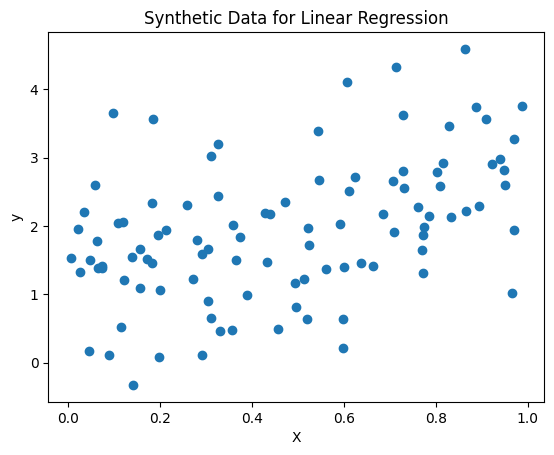

In [3]:
# Plot the synthetic data
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data for Linear Regression')
plt.show()

In [4]:
# Define the Bayesian linear regression model
def bayesian_linear_regression(X, y, num_samples=1000):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)  # Compute the maximum likelihood estimate
    sigma_squared = np.sum((y - X_b.dot(theta)) ** 2) / (X.shape[0] - X.shape[1])  # Compute the variance
    prior_mean = np.zeros((X.shape[1] + 1, 1))  # Prior mean
    prior_cov = np.eye(X.shape[1] + 1)  # Prior covariance
    posterior_cov = np.linalg.inv(np.linalg.inv(prior_cov) + (1 / sigma_squared) * X_b.T.dot(X_b))  # Posterior covariance
    posterior_mean = posterior_cov.dot(np.linalg.inv(prior_cov).dot(prior_mean) + (1 / sigma_squared) * X_b.T.dot(y))  # Posterior mean
    # Sample from the posterior distribution
    theta_samples = np.random.multivariate_normal(posterior_mean.ravel(), posterior_cov, size=num_samples)
    
    return theta_samples

In [5]:
# Fit the Bayesian linear regression model to the synthetic data
theta_samples = bayesian_linear_regression(X, y)

Text(0.5, 1.0, 'Posterior Distribution of Intercept')

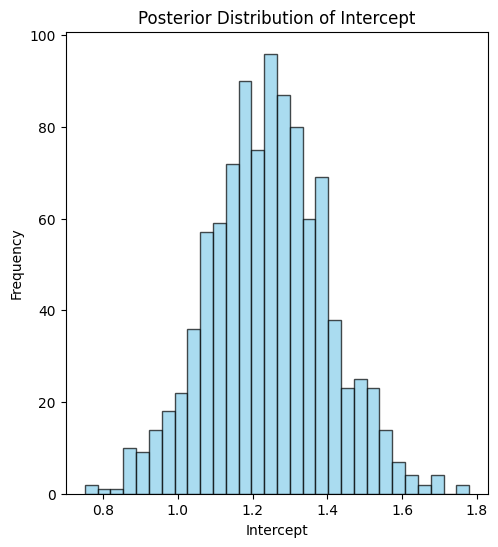

In [6]:
# Plot the posterior distribution of the regression coefficients
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(theta_samples[:, 0], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Intercept')
plt.ylabel('Frequency')
plt.title('Posterior Distribution of Intercept')

Text(0.5, 1.0, 'Posterior Distribution of Slope')

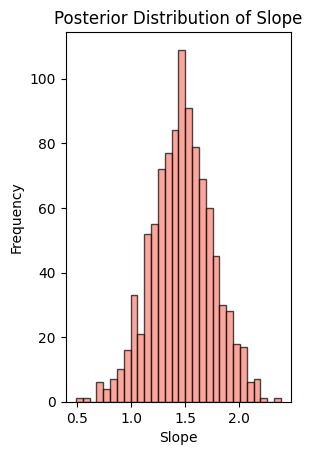

In [7]:
plt.subplot(1, 2, 2)
plt.hist(theta_samples[:, 1], bins=30, color='salmon', edgecolor='black', alpha=0.7)
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.title('Posterior Distribution of Slope')

In [8]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

## Bayesian Linear Regression

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm

In [11]:
# Generate some toy data for linear regression
np.random.seed(0)
X = np.linspace(0, 10, 100)
true_slope = 2
true_intercept = 1
true_noise = 1
Y = true_slope * X + true_intercept + np.random.normal(0, true_noise, size=100)

In [12]:
# Define the Bayesian linear regression model
with pm.Model() as linear_model:
    # Priors
    sigma = pm.HalfNormal('sigma', sigma=1)
    intercept = pm.Normal('intercept', mu=0, sigma=1)
    slope = pm.Normal('slope', mu=0, sigma=1)
    
    # Expected value of outcome
    mu = intercept + slope * X
    
    # Likelihood
    likelihood = pm.Normal('Y', mu=mu, sigma=sigma, observed=Y)
    
    # Sample posterior distribution
    trace = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, intercept, slope]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 11 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


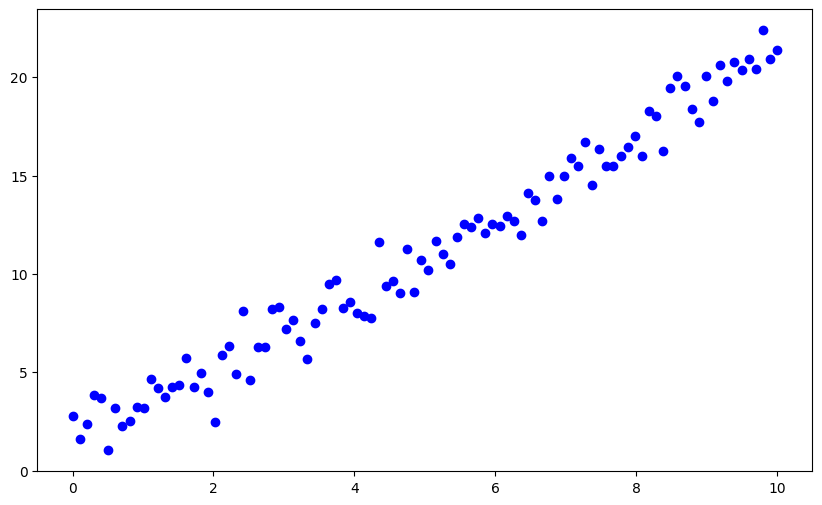

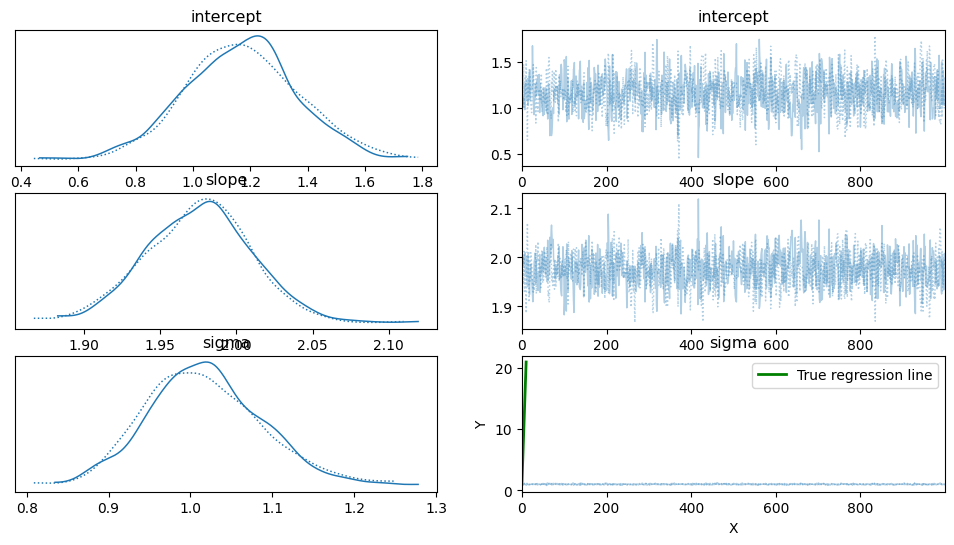

In [15]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Observed data')
pm.plot_trace(trace)  # Use pymc.plot_trace(trace) or arviz.plot_trace(trace)
plt.plot(X, true_slope*X + true_intercept, color='green', label='True regression line', linewidth=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## Bayesian Inference

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm

In [18]:
# Generate some example data
np.random.seed(42)
X = np.random.rand(100, 1)
true_slope = 2
true_intercept = 1
y = true_intercept + true_slope * X + np.random.randn(100, 1)

In [20]:
import pymc as pm

# Bayesian linear regression model
with pm.Model() as linear_model:
    # Priors for the regression coefficients
    slope = pm.Normal('slope', mu=0, sigma=10)
    intercept = pm.Normal('intercept', mu=0, sigma=10)

In [22]:

import pymc as pm
import numpy as np

# Generate some example data
np.random.seed(42)
true_slope = 2.0
true_intercept = 5.0
x = np.linspace(0, 10, 100)
y = true_slope * x + true_intercept + np.random.normal(0, 1, 100)

# Bayesian linear regression model
with pm.Model() as linear_model:
    # Priors for the regression coefficients
    slope = pm.Normal('slope', mu=0, sigma=10)
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    
    # Expected value of outcome
    mu = slope * x + intercept
    
    # Likelihood (sampling distribution) of observations
    likelihood = pm.Normal('y', mu=mu, sigma=1, observed=y)


In [60]:

with linear_model:
    trace = pm.sample(1000, tune=1000, cores=1)  # Sampling from the posterior distribution


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta, alpha]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 9 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


array([[<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>]], dtype=object)

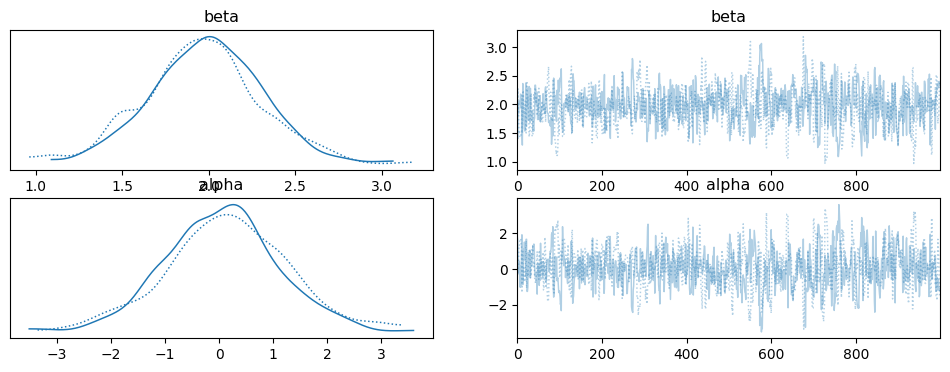

In [61]:
import arviz as az
# Plot the posterior distributions of the coefficients
az.plot_trace(trace)

## Prior and Posterior Distributions

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm

In [63]:
# Generate some synthetic data for linear regression
np.random.seed(42)
x = np.random.uniform(0, 10, 100)
true_slope = 2
true_intercept = 5
y = true_slope * x + true_intercept + np.random.normal(0, 1, 100)

In [64]:
# Plot the prior and posterior distributions
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

KeyError: 'alpha'

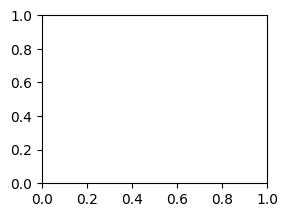

In [76]:
plt.subplot(2, 2, 2)
intercept_values = trace['alpha'].values.flatten()

sns.kdeplot(intercept_values, shade=True)
plt.axvline(true_intercept, color='r', linestyle='--')
plt.title('Prior Distribution of Intercept')

KeyError: 'slope'

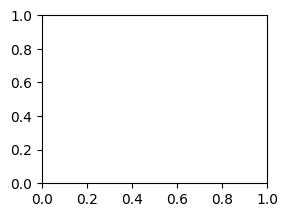

In [44]:
plt.subplot(2, 2, 3)
sns.scatterplot(trace['slope'], trace['intercept'], alpha=0.1)
plt.scatter(true_slope, true_intercept, color='r', marker='x', label='True Values')
plt.xlabel('Slope')
plt.ylabel('Intercept')
plt.title('Posterior Distribution of Parameters')

In [45]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

## Model Training

In [46]:
import pymc as pm
import numpy as np

In [47]:
# Define the features X and target variable y
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 4, 6, 8, 10])

In [48]:
# Create a PyMC3 model
with pm.Model() as linear_model:
    # Priors for the parameters
    beta = pm.Normal('beta', mu=0, sigma=10)
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    
    # Expected value of the outcome
    mu = alpha + beta * X.flatten()
    
    # Likelihood of the data
    y_obs = pm.Normal('y_obs', mu=mu, sigma=1, observed=y)
    
    # Sample from the posterior using MCMC
    trace = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta, alpha]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 12 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


In [49]:
# Display a summary of the model
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta,2.000,0.323,1.399,2.633,0.014,0.010,569.0,498.0,1.0
alpha,-0.009,1.068,-1.765,2.217,0.045,0.037,559.0,622.0,1.0


## Model Evaluation

In [51]:
# Import necessary libraries
import numpy as np
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# Generate some sample data for demonstration purposes
np.random.seed(42)
X = np.random.rand(100, 1)
y = 2 + 3 * X.squeeze() + np.random.randn(100)

In [ ]:
# Fit the Bayesian linear regression model
model = BayesianRidge()
model.fit(X, y)

In [ ]:
# Make predictions using the model
y_pred = model.predict(X)

In [ ]:
# Calculate the mean squared error to evaluate the model's performance
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)